In [1]:
import torch
import cv2
import numpy as np

import config
from model import YOLOv3
from utils import (
    get_loaders,
    plot_couple_examples
)

torch.backends.cudnn.benchmark = True

/home/neik/miniconda3/envs/yolov3/lib/python3.7/site-packages/albumentations/imgaug/transforms.py:337: FutureWarning: This IAAAffine is deprecated. Please use Affine instead
  warnings.warn("This IAAAffine is deprecated. Please use Affine instead", FutureWarning)


In [2]:
model = YOLOv3(num_classes=20).to(config.DEVICE)
checkpoint = torch.load('my_checkpoint.pth.tar', map_location=config.DEVICE)
model.load_state_dict(checkpoint['state_dict'])
model.eval()

train_loader, test_loader, train_eval_loader = get_loaders(
    train_csv_path=config.DATASET + "/100examples.csv",
    test_csv_path=config.DATASET + "/100examples.csv"
)

torch.Size([1, 3, 416, 416])


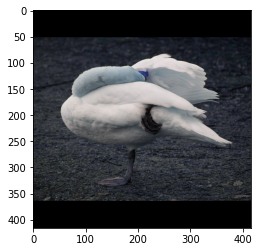

In [124]:
input = None
for idx, (x, _) in enumerate(test_loader):
    if idx == 30:
        print(x.shape)
        input = x
import matplotlib.pyplot as plt
plt.imshow(input.squeeze().permute(1, 2, 0))


In [131]:
out = model(input.to(config.DEVICE))
out[0] = out[0].reshape(1, 3, -1 ,25)
out[1] = out[1].reshape(1, 3, -1 ,25)
out[2] = out[2].reshape(1, 3, -1 ,25)
out = torch.cat(out, dim=2).to(config.DEVICE)
print(out.shape)
print(torch.argmax(out[..., 0:1], dim=2, keepdim=True))
# print(torch.max(out[..., 0:1], dim=2, keepdim=True))
out[..., 1:3] = torch.sigmoid(out[..., 1:3])
out[..., 3:5] = torch.exp(out[..., 3:5]) * torch.tensor(config.ANCHORS)[1].reshape(1, 3, 1, 2).to(config.DEVICE)
print(out[0, 0, 2601, 0:5])
print(out[0, 1, 1946, 0:5])
print(out[0, 2, 2224, 0:5])

torch.Size([1, 3, 3549, 25])
tensor([[[[2601]],

         [[1946]],

         [[2224]]]], device='cuda:0')
tensor([0.5131, 0.4164, 0.4380, 0.0431, 0.1721], device='cuda:0',
       grad_fn=<SliceBackward>)
tensor([1.2447, 0.4807, 0.6202, 0.1185, 0.0177], device='cuda:0',
       grad_fn=<SliceBackward>)
tensor([1.1654, 0.3508, 0.5548, 1.2114, 2.0691], device='cuda:0',
       grad_fn=<SliceBackward>)


tensor([199.9574, 257.9833,  49.3127,   7.3549], device='cuda:0',
       grad_fn=<MulBackward0>)


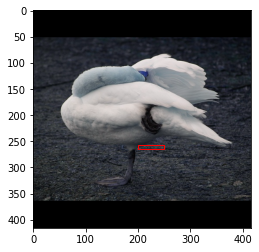

In [130]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image


# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(input.squeeze().permute(1, 2, 0))

# Create a Rectangle patch
print(out[0, 1, 1946, 1:5] * 416)
values = (out[0, 1, 1946, 1:5] * 416).tolist()
rect = patches.Rectangle((values[0], values[1]), values[2], values[3], linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

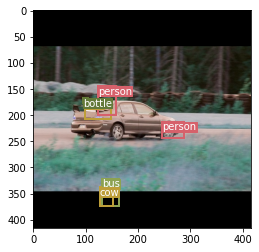

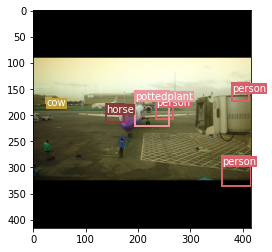

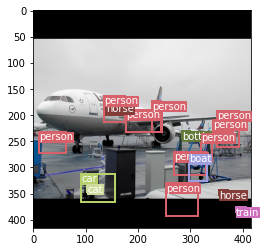

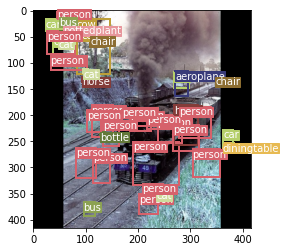

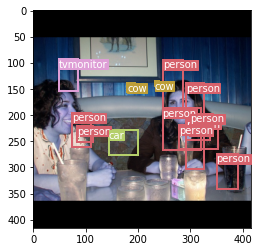

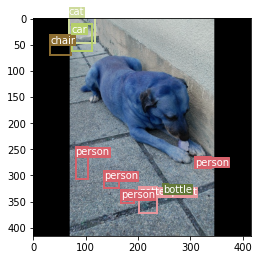

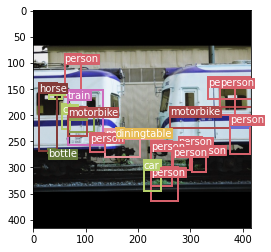

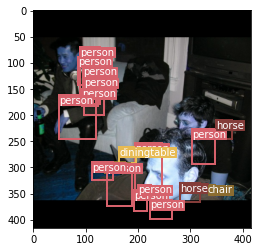

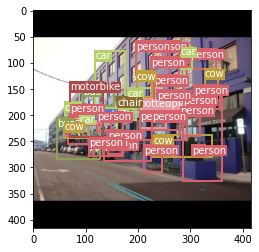

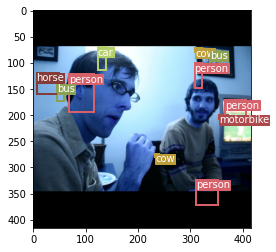

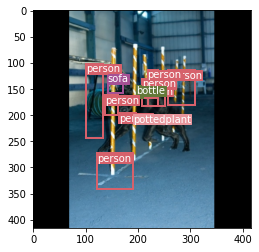

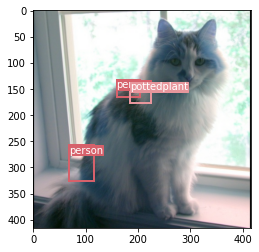

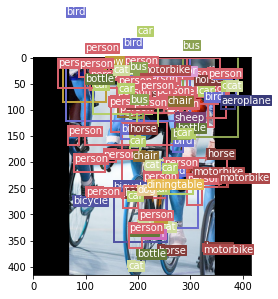

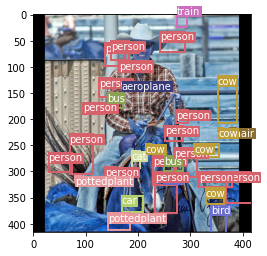

In [3]:
scaled_anchors = (
        torch.tensor(config.ANCHORS)
        * torch.tensor(config.S).unsqueeze(1).unsqueeze(1).repeat(1, 3, 2)
    ).to(config.DEVICE)

plot_couple_examples(model, test_loader, 0.6, 0.5, scaled_anchors)